# <center><h2> Cervical Cancer Classification </h2></center>

## Step 1 : Importing Libraries and Data

In [1]:
# importing libraries
import numpy as np # for linear algebra
import pandas as pd # data preprocessing

import tensorflow as tf # deep learning
from tensorflow.keras import layers, models # working on layers
import matplotlib.pyplot as plt # data visualization

In [2]:
# setting image_size and batch_size
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
# importing dataset directory 
df = tf.keras.preprocessing.image_dataset_from_directory("Cervical Cancer photos",shuffle=True,image_size= (IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size= BATCH_SIZE)

Found 1146 files belonging to 5 classes.


In [4]:
# getting class names
class_names = df.class_names
class_names

['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial']

In [5]:
# len of dataset ( Total number of files/ batch size)
len(df)

36

In [6]:
36*32 #1152, but number of files are 1146 only

1152

In [7]:
print(df)  # None is the undefined batch size, (256,256) is the image size and 3 = channels(RGB)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## Step 2 : Viewing Data Images

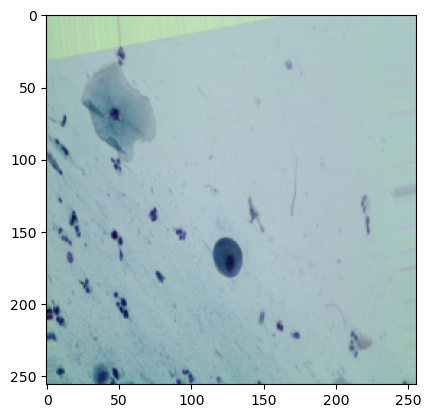

In [8]:
# viewing image 
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    
    # plt.axis("off") : used to view image without axis points
# refreshing every time gives another picture and label as given

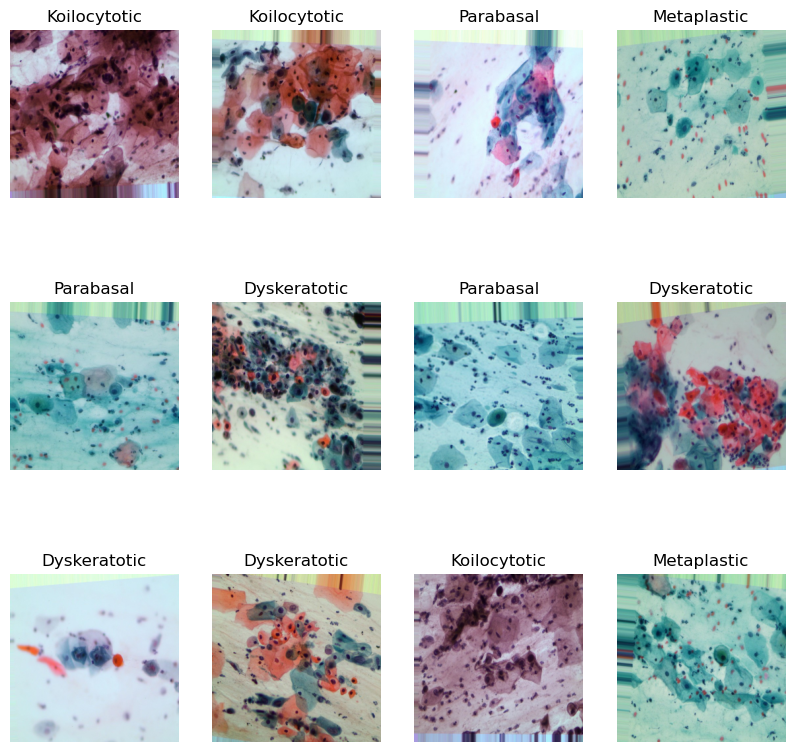

In [9]:
# images with the labels
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        
# refreshing every time gives another picture and label as given

## Step 3 : Splitting Dataset

### 80% --> Training
### 20% --> 10% Validation and 10% Testing

In [11]:
# channels (RGB[Red, Green, Blue]), Epochs = 50
CHANNELS = 3
EPOCHS = 50

In [14]:
# checking the length of training data
train_size = 0.7
len(df) * train_size

25.2

In [15]:
# length of validation and test data
val_n_test = len(df) - (len(df) * train_size)
val_n_test

10.8

In [19]:
# splitting the data into training , validation and testing data

def split_datasets(pc,train_split = 0.7,val_split = 0.15, test_split = 0.15, shuffle = True, shuffle_size = 10000):
    if shuffle:
        pc = pc.shuffle(shuffle_size,seed = 10)
        
    pc_size = len(pc) # size of potato_data(36)
    train_size = int(train_split*pc_size)
    val_size = int(val_split*pc_size)
    
    train_pc = pc.take(train_size) # taking first 25 batches(out of 36)
    val_pc = pc.skip(train_size).take(val_size) # leaving first 25 and taking next 5 batches
    test_pc = pc.skip(train_size).skip(val_size) # skipping first 25(train) batch and 5(validation) batch and 
                                                 #taking left 6 batches for test
    
    return train_pc, val_pc, test_pc

In [20]:
# getting the training, validation and testing data by 'split_datasets' function
train_data, val_data, test_data = split_datasets(df)

In [21]:
# printing the size of all data splits
print("Size of Data is :{0} \nBatch Size of Training Data is :{1} \nBatch Size of Validation Data :{2} \nBatch Size of Test Data :{3}"
      .format(len(df), len(train_data), len(val_data), len(test_data)))

Size of Data is :36 
Batch Size of Training Data is :25 
Batch Size of Validation Data :5 
Batch Size of Test Data :6


In [22]:
# caching, shuffling and prefetching the data
train_pc = train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_pc = val_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_pc = test_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

## Step 4 : Data Pre-Processing 

In [23]:
# Image Preprocessing : Rescaling and Resizing
rescale_n_resize = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Data Augmentation by flipping and rotating existing images
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode ='horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(factor=0.5)
])

## Step 5 : Model Building

In [24]:
# creating CNN
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    rescale_n_resize,
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'softmax')
    
])

model.build(input_shape=input_shape)

In [25]:
# model_summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
# optimizing the model
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

## Step 6 : Model Training and Analysis

In [27]:
# fitting the model
history = model.fit(train_data, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=val_data, verbose=1)

Epoch 1/50
25/25 [==============================] - 52s 2s/step - loss: 2.3016 - accuracy: 0.1902 - val_loss: 1.6786 - val_accuracy: 0.1937
Epoch 2/50
25/25 [==============================] - 42s 2s/step - loss: 1.6841 - accuracy: 0.1889 - val_loss: 1.6613 - val_accuracy: 0.2338
Epoch 3/50
25/25 [==============================] - 43s 2s/step - loss: 1.5595 - accuracy: 0.2897 - val_loss: 1.6819 - val_accuracy: 0.2188
Epoch 4/50
25/25 [==============================] - 42s 2s/step - loss: 1.4670 - accuracy: 0.3300 - val_loss: 1.3648 - val_accuracy: 0.4500
Epoch 5/50
25/25 [==============================] - 44s 2s/step - loss: 1.3180 - accuracy: 0.4043 - val_loss: 1.5285 - val_accuracy: 0.2750
Epoch 6/50
25/25 [==============================] - 45s 2s/step - loss: 1.3041 - accuracy: 0.3841 - val_loss: 1.2342 - val_accuracy: 0.4375
Epoch 7/50
25/25 [==============================] - 44s 2s/step - loss: 1.3120 - accuracy: 0.4005 - val_loss: 1.2416 - val_accuracy: 0.4313
Epoch 8/50
25/25 [==

In [28]:
# evaluating the scores
scores = model.evaluate(train_data)
scores

25/25 [==============================] - 11s 385ms/step - loss: 0.4647 - accuracy: 0.7191


[0.4647221267223358, 0.7191435694694519]

In [29]:
# getting the keys of fitted model "History"
history.params, history.history.keys()

({'verbose': 1, 'epochs': 50, 'steps': 25},
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [30]:
# assigning names to the keys
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

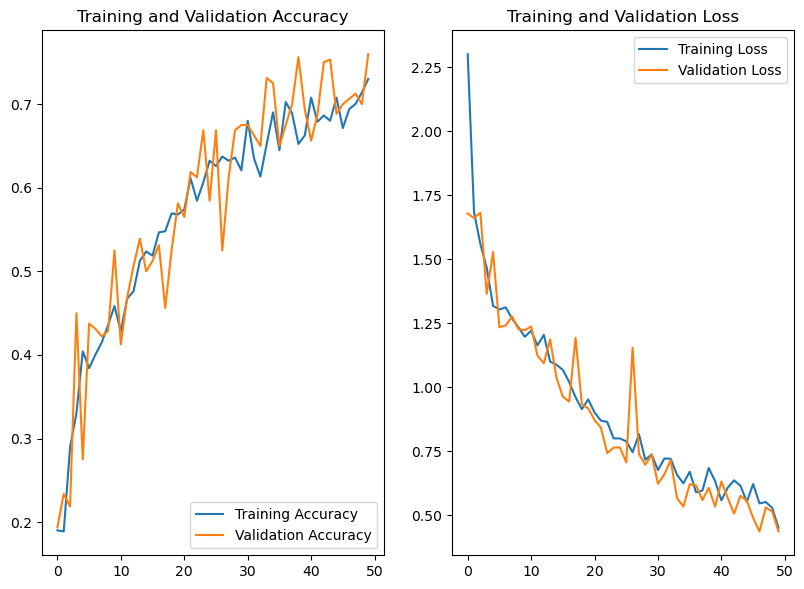

In [31]:
# plotting the comparison graphs
plt.figure(figsize = (15,15))

# Accuracy Table
plt.subplot(2,3,1)
plt.plot(range(EPOCHS),train_acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Table
plt.subplot(2,3,2)
plt.plot(range(EPOCHS),train_loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

1/1 [==============================] - 0s 425ms/step


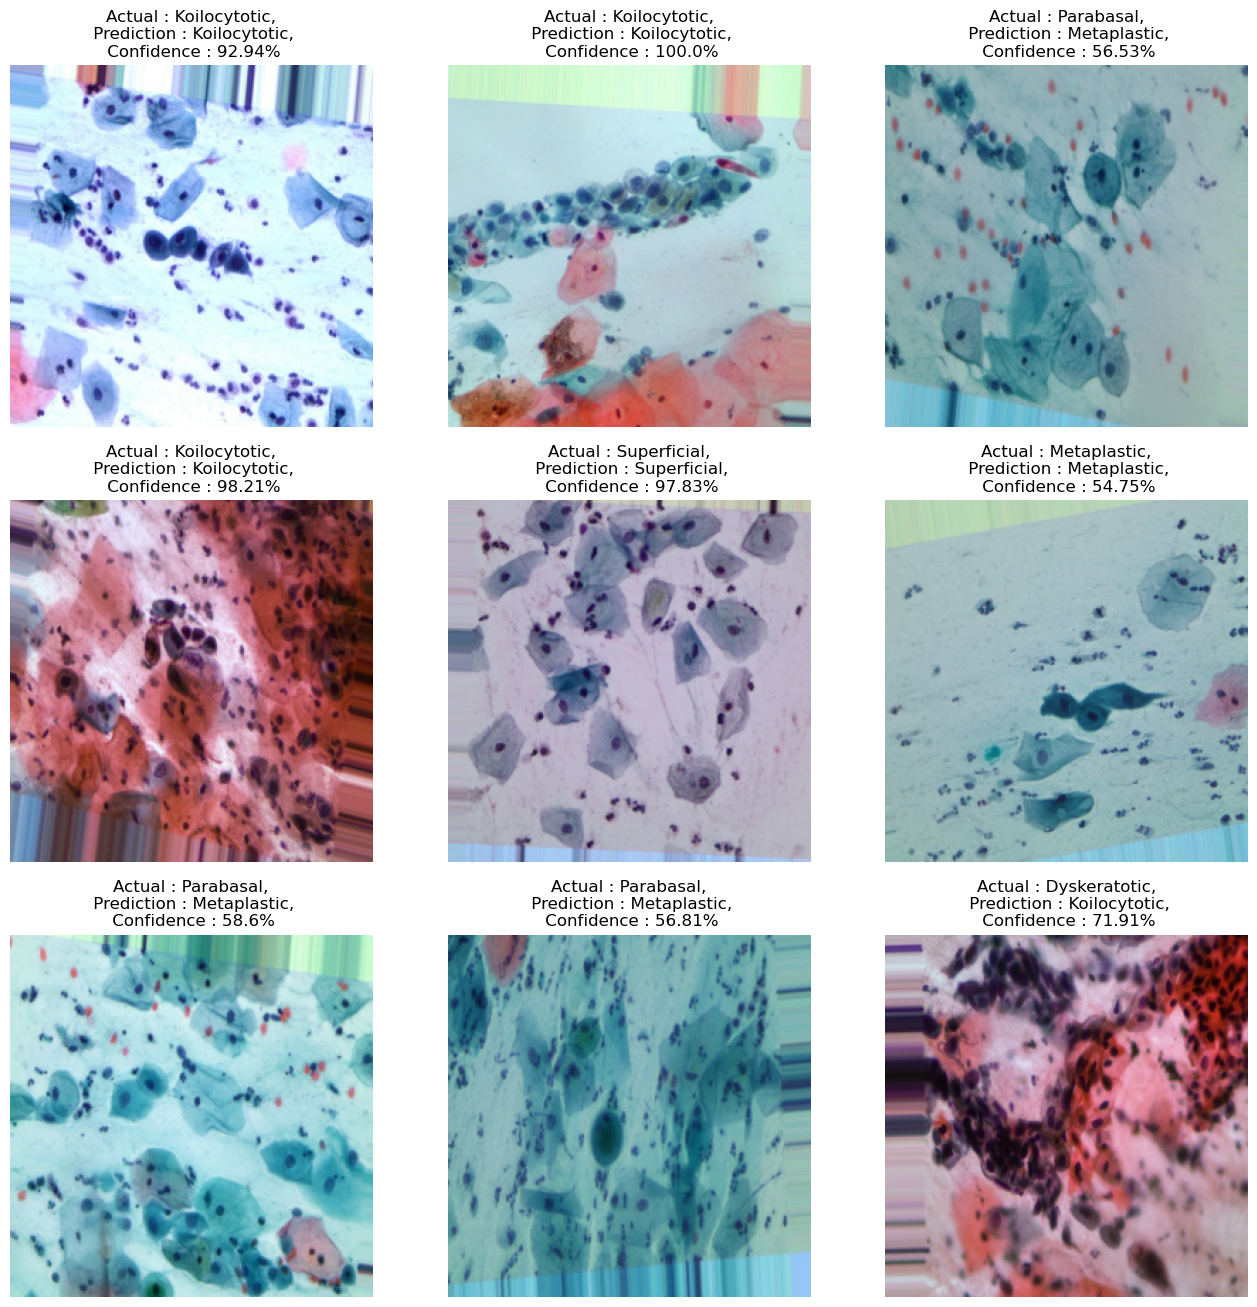

In [32]:
# plotting batch of test images with its actual label, predicted label and confidence
plt.figure(figsize = (16,16))
for batch_image, batch_label in test_pc.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_names[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')